# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pandas import *
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
device = ("cuda" if torch.cuda.is_available() else "cpu")

C:\Users\Itachi Bal\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Defining parameters

In [4]:
epochs = 10
batch_size_train = 100
batch_size_test = 100
learning_rate = 0.01
momentum = 0.5


#  Loading  and transforming the data

In [5]:
transform = torchvision.transforms.Compose([ torchvision.transforms.ToTensor(), torchvision.transforms.Normalize( (0.1307,), (0.3081,)) ])
train_set = datasets.MNIST(root='./data', train=True,download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100,shuffle=True, num_workers=2)

test_set = datasets.MNIST(root='./data', train=False,download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100,shuffle=False, num_workers=2)


# Displaying some random images

Before displaying the images, I have Un-normalized the data and then plotted the random images

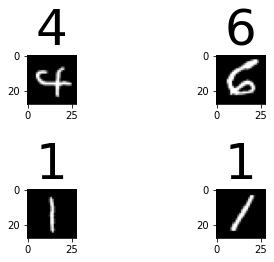

In [6]:
train_loader
dataiter = iter(train_loader)
images, labels = dataiter.next()
mn=images.view(100,28,28)
mn.size()
mnop=(mn*0.1307) + 0.3801 #unnormalize
mnop.size()
fig,a =  plt.subplots(2,2) # 2*2 subplots which can display 4 images
a[0][0].imshow(mnop.numpy()[0], cmap='gray') # random image
a[0][0].set_title(labels[0].numpy(),fontsize=50) # Original class of the random image 
a[0][1].imshow(mnop.numpy()[1], cmap='gray')
a[0][1].set_title(labels[1].numpy(),fontsize=50)
a[1][0].imshow(mnop.numpy()[2], cmap='gray')
a[1][0].set_title(labels[2].numpy(),fontsize=50)
a[1][1].imshow(mnop.numpy()[3], cmap='gray')
a[1][1].set_title(labels[3].numpy(),fontsize=50)
fig.tight_layout(pad=2.0)
plt.show()

# Defining the class 

In [7]:
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32,kernel_size=2)
        self.pool = nn.MaxPool2d(kernel_size=2) 
        self.fc1 = nn.Linear(5408, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        self.features=F.relu(self.conv1(x))
        x = self.pool(self.features)
        x = x.view(x.size(0), -1)
        # x = x.view(-1, numpy.product(x.shape))
        x = self.fc1(x)
        x = F.relu(x)
        x = (self.fc2(x))
        return x

model = myCNN()

optimizer = optim.SGD(model.parameters(), lr=0.01)
#error = nn.CrossEntropyLoss()
criterion= nn.CrossEntropyLoss()


Here I have built the network with a convolutional layer and followed by a pooling layer(which uses max pooling mechanism).

The outputs are then passed on to the linear layers which in the end produces 10 outputs.

The activation functions used are RELU and softmax activations. Softmax activation is used to the final layer in the training of the model.

Coming to the loss function and gradient functions, I have opted for cross entropy loss and stochastic gradient descent

# Training & Testing


In [8]:
epochs = 10
loss_history_train=[] # contains losses of each batch that has been calculated
loss_history_test=[]
loss_per_100batch=[]# contains loss values for every 100 batches

accuracy_train=[] # accuracy of training
accuracy_total_train=[] # accuracy values of training after each epoch is stored

accuracy_test=[] # accuracy of testing
accuracy_total_test=[] # accuracy values of testing after each epoch is stored

loss_total_train=[] # contains total loss after each epoch(training)
loss_total_test=[] # contains total loss after each epoch(testing)

In [9]:
for epoch in range(epochs):
    model.train()
    total = 0
    loss_epoch_train=[]
    # training our model
    for idx, (image, label) in enumerate(train_loader):
        image = Variable(image)
        label = Variable(label)
        optimizer.zero_grad() 
        pred = model(image) #predicting the classes
        loss = criterion(pred, label)#calculating the losses for the appropriate batch
        loss_history_train.append(loss.item()) # storing the loss values of every single batch
        loss_epoch_train.append(loss.item())
        loss.backward()
        optimizer.step()

        if idx % 100 == 0:
            loss_per_100batch.append(loss.item()) # storing loss values after every 100 batches
        for i, p in enumerate(pred): # calculating the no. of correct predictions and stroing them in total
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
    accuracy_train = total / len(train_set) #calculating accuracy after each epoch
    accuracy_total_train.append(accuracy_train) #storing the accuracy values after each epoch
    sum_loss_train=sum(loss_epoch_train) # total loss for an epoch
    loss_total_train.append(sum_loss_train) # storing them after each epoch
    
    
    # validating our model
    model.eval()
    total = 0
    loss_epoch_test=[]
    for idx, (image, label) in enumerate(test_loader):
        
        image = Variable(image)
        label = Variable(label)
        pred = model(image)
        loss = criterion(pred, label)
        loss_history_test.append(loss.item()) # total history of losses
        loss_epoch_test.append(loss.item()) # storing losses of a single epoch
        
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1
    
    accuracy_test = total / len(test_set)
    accuracy_total_test.append(accuracy_test)
    sum_loss_test=sum(loss_epoch_test)
    loss_total_test.append(sum_loss_test)

    if epoch % 1 == 0:
      print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(sum_loss_train),
            "Testing loss: {:.4f}  ".format(sum_loss_test),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_test))



Epoch: 0/10   Training loss: 299.7767   Testing loss: 28.4626   Train accuracy: 0.8709   Test accuracy: 0.9186  
Epoch: 1/10   Training loss: 158.9396   Testing loss: 23.1845   Train accuracy: 0.9225   Test accuracy: 0.9323  
Epoch: 2/10   Training loss: 127.7025   Testing loss: 18.6434   Train accuracy: 0.9379   Test accuracy: 0.9469  
Epoch: 3/10   Training loss: 105.8351   Testing loss: 15.6639   Train accuracy: 0.9488   Test accuracy: 0.9530  
Epoch: 4/10   Training loss: 90.0594   Testing loss: 14.0380   Train accuracy: 0.9567   Test accuracy: 0.9595  
Epoch: 5/10   Training loss: 77.9758   Testing loss: 12.2313   Train accuracy: 0.9625   Test accuracy: 0.9642  
Epoch: 6/10   Training loss: 68.9441   Testing loss: 11.0506   Train accuracy: 0.9671   Test accuracy: 0.9678  
Epoch: 7/10   Training loss: 61.4475   Testing loss: 10.1067   Train accuracy: 0.9706   Test accuracy: 0.9714  
Epoch: 8/10   Training loss: 55.6233   Testing loss: 9.4142   Train accuracy: 0.9735   Test accuracy

According to the data above, we can infer that the model was overfit to the data in the early stages and slowly the fitness of the model improved towards the end. 

# Plotting the accuracies, Training vs Testing

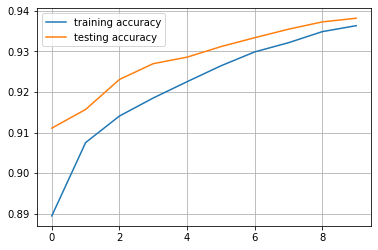

In [19]:
plt.plot(accuracy_total_train,label='training accuracy')
plt.plot(accuracy_total_test,label='testing accuracy')
plt.legend()
plt.grid()

# Defining a class for giving kernel size parameter in the constructer

In [9]:
class myCNN(nn.Module):
        def __init__(self,kernelSize):
            super(myCNN, self).__init__()
            self.conv1 = nn.Conv2d(1, 32,kernel_size=kernelSize)
            self.pool = nn.MaxPool2d(kernel_size=2)
            
            self.fc1 = nn.Linear((((28-kernelSize)+1)//2)**2*32, 128)
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = self.pool(F.relu(self.conv1(x)))
            x = x.view(x.size(0), -1)
            # x = x.view(-1, numpy.product(x.shape))
            x = self.fc1(x)
            x = F.relu(x)
            x = self.fc2(x)
            #x = F.softmax(self.fc2(x))
            return x


In [10]:
model = myCNN(3) # example structure for kernel size 3
model

myCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5408, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Epoch: 0/5   Training loss: 285.3313   Testing loss: 26.7213   Train accuracy: 0.8779   Test accuracy: 0.9239  
Epoch: 1/5   Training loss: 146.2886   Testing loss: 21.3312   Train accuracy: 0.9287   Test accuracy: 0.9374  
Epoch: 2/5   Training loss: 112.8854   Testing loss: 15.9010   Train accuracy: 0.9450   Test accuracy: 0.9540  
Epoch: 3/5   Training loss: 90.8663   Testing loss: 13.3669   Train accuracy: 0.9563   Test accuracy: 0.9615  
Epoch: 4/5   Training loss: 75.6556   Testing loss: 11.0874   Train accuracy: 0.9644   Test accuracy: 0.9674  
Epoch: 0/5   Training loss: 285.7806   Testing loss: 24.8899   Train accuracy: 0.8767   Test accuracy: 0.9304  
Epoch: 1/5   Training loss: 133.6376   Testing loss: 17.8541   Train accuracy: 0.9360   Test accuracy: 0.9497  
Epoch: 2/5   Training loss: 98.7268   Testing loss: 13.9723   Train accuracy: 0.9534   Test accuracy: 0.9587  
Epoch: 3/5   Training loss: 77.7619   Testing loss: 10.9356   Train accuracy: 0.9633   Test accuracy: 0.967

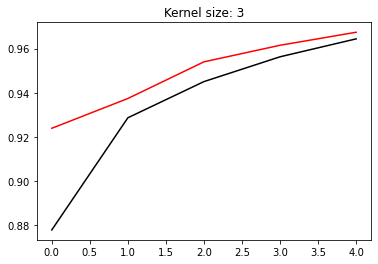

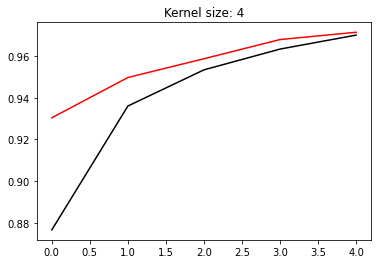

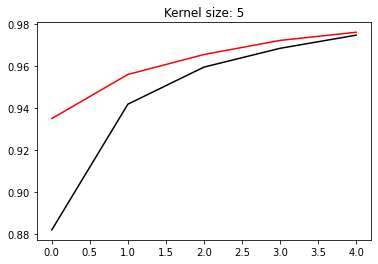

In [11]:
kernelSizes=[3,4,5]

for kernelSize in kernelSizes:
    
    model = myCNN(kernelSize)

    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion= nn.CrossEntropyLoss()
    
    epochs = 5
    loss_history_train=[] # contains losses of each batch that has been calculated
    loss_history_test=[]
    loss_per_100batch=[]# contains loss values for every 100 batches

    accuracy_train=[] # accuracy of training
    accuracy_total_train=[] # accuracy values of training after each epoch is stored

    accuracy_test=[] # accuracy of testing
    accuracy_total_test=[] # accuracy values of testing after each epoch is stored

    loss_total_train=[] # contains total loss after each epoch(training)
    loss_total_test=[] # contains total loss after each epoch(testing)
    for epoch in range(epochs):
        model.train()
        total = 0
        loss_epoch_train=[]
        # training our model
        for idx, (image, label) in enumerate(train_loader):
            image = Variable(image)
            label = Variable(label)
            optimizer.zero_grad() 
            pred = model(image) #predicting the classes
            loss = criterion(pred, label)#calculating the losses for the appropriate batch
            loss_history_train.append(loss.item()) # storing the loss values of every single batch
            loss_epoch_train.append(loss.item())
            loss.backward()
            optimizer.step()
    
            if idx % 100 == 0:
                loss_per_100batch.append(loss.item()) # storing loss values after every 100 batches
            for i, p in enumerate(pred): # calculating the no. of correct predictions and stroing them in total
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1
                    
        accuracy_train = total / len(train_set) #calculating accuracy after each epoch
        accuracy_total_train.append(accuracy_train) #storing the accuracy values after each epoch
        sum_loss_train=sum(loss_epoch_train) # total loss for an epoch
        loss_total_train.append(sum_loss_train) # storing them after each epoch
        
        
        # validating our model
        model.eval()
        total = 0
        loss_epoch_test=[]
        for idx, (image, label) in enumerate(test_loader):
            
            image = Variable(image)
            label = Variable(label)
            pred = model(image)
            loss = criterion(pred, label)
            loss_history_test.append(loss.item()) # total history of losses
            loss_epoch_test.append(loss.item()) # storing losses of a single epoch
            
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1
        
        accuracy_test = total / len(test_set)
        accuracy_total_test.append(accuracy_test)
        sum_loss_test=sum(loss_epoch_test)
        loss_total_test.append(sum_loss_test)
    
        if epoch % 1 == 0:
          print("Epoch: {}/{}  ".format(epoch, epochs),
                "Training loss: {:.4f}  ".format(sum_loss_train),
                "Testing loss: {:.4f}  ".format(sum_loss_test),
                "Train accuracy: {:.4f}  ".format(accuracy_train),
                "Test accuracy: {:.4f}  ".format(accuracy_test))    
    plt.figure()
    plt.plot(accuracy_total_train,'k')
    plt.plot(accuracy_total_test,'r')
    plt.title("Kernel size: "+str(kernelSize))

In [44]:
model.features.size()

torch.Size([1, 32, 27, 27])

# Predicting random image

In [45]:
model(images[1].view(1,1,28,28))

tensor([[ 0.7457, -1.4423,  0.7690, -4.5332,  1.9178,  3.5258,  8.5685, -7.3969,
          0.0711, -2.2973]], grad_fn=<AddmmBackward>)

# Originial Image 

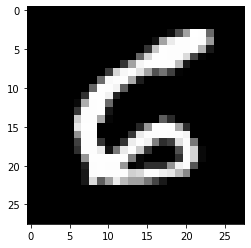

In [67]:
plt.imshow(images[1].view(28,28), cmap='gray')

# Converting tensor to numpy array

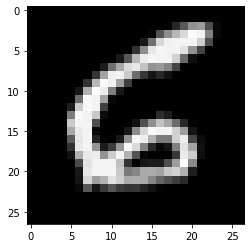

In [78]:
plt.imshow(model.features[0][1].cpu().detach().numpy(), cmap='gray')
#plt.imshow(model.features.numpy()[0][1], cmap='gray')

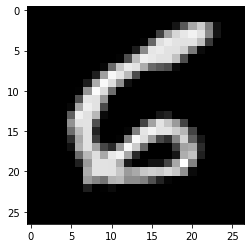

In [79]:
plt.imshow(model.features[0][2].cpu().detach().numpy(), cmap='gray')


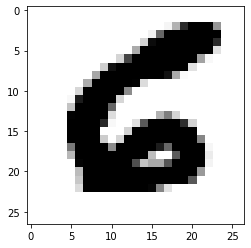

In [80]:
plt.imshow(model.features[0][3].cpu().detach().numpy(), cmap='gray')


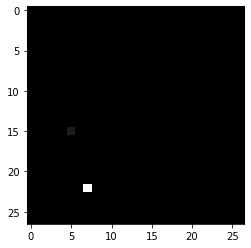

In [81]:
plt.imshow(model.features[0][4].cpu().detach().numpy(), cmap='gray')


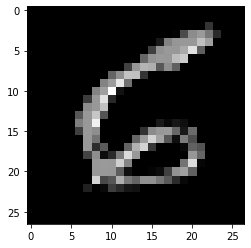

In [82]:
plt.imshow(model.features[0][5].cpu().detach().numpy(), cmap='gray')


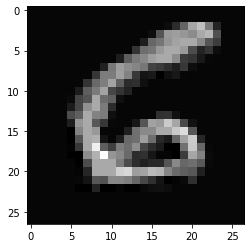

In [83]:
plt.imshow(model.features[0][6].cpu().detach().numpy(), cmap='gray')
